In [1]:
import sys

sys.path.insert(0, "../")

import numpy as np
from tqdm import tqdm
from visualisation import display_images, plot_histograms_in_3d
from apply_histogram import apply_histogram
from utils import compute_histogram, kldiv
import plotly.graph_objects as go
from PIL import Image
from training import HistogramDataset

from config import TEST_DATA

BINS = 16
dataset = HistogramDataset(TEST_DATA, bin_count=BINS, target_size=(512, 512))

og = np.array(dataset.get_original_image(65))
og = og.astype(np.uint8)
edit = np.array(dataset.get_edited_image(65, edit_idx=5))

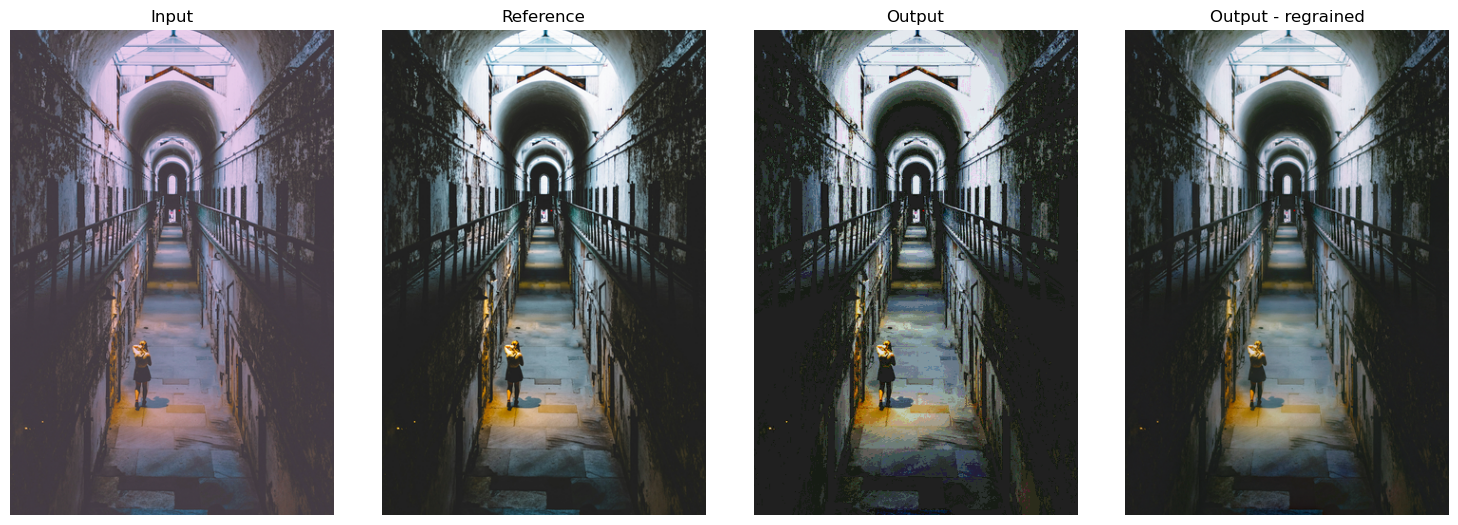

In [2]:
display_images(
    {
        "Input": Image.fromarray(edit),
        "Reference": Image.fromarray(og),
        "Output": apply_histogram(
            source_img=edit,
            target_histogram=compute_histogram(og, bins=BINS),
            iterations=25,
            should_regrain=False,
        ),
        "Output - regrained": apply_histogram(
            source_img=edit,
            target_histogram=compute_histogram(og, bins=BINS),
            iterations=25,
        ),
    },
    images_per_row=4,
    img_size_inches=6,
)

None

In [3]:
ys = []

for i in tqdm(range(3, 25)):
    img_arr_out = apply_histogram(
        source_img=edit,
        target_histogram=compute_histogram(og, bins=BINS),
        iterations=i,
        should_regrain=False,
    )
    ys.append(
        kldiv(
            compute_histogram(img_arr_out, bins=BINS),
            compute_histogram(og, bins=BINS),
        )
    )
go.Figure(go.Scatter(x=list(range(len(ys))), y=ys, mode="lines+markers", name="Data"))

100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
